<a href="https://colab.research.google.com/github/26Kenn07/Machine-Learning-Projects/blob/main/Diabetes_Prediction_Using_RandomForestClassifier_%26_AdaBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0.0,1.0,never,25.19,6.6,140.0,0.0
1,Female,54.0,0.0,0.0,No Info,27.32,6.6,80.0,0.0
2,Male,28.0,0.0,0.0,never,27.32,5.7,158.0,0.0
3,Female,36.0,0.0,0.0,current,23.45,5.0,155.0,0.0
4,Male,76.0,1.0,1.0,current,20.14,4.8,155.0,0.0


In [5]:
df.shape

(55046, 9)

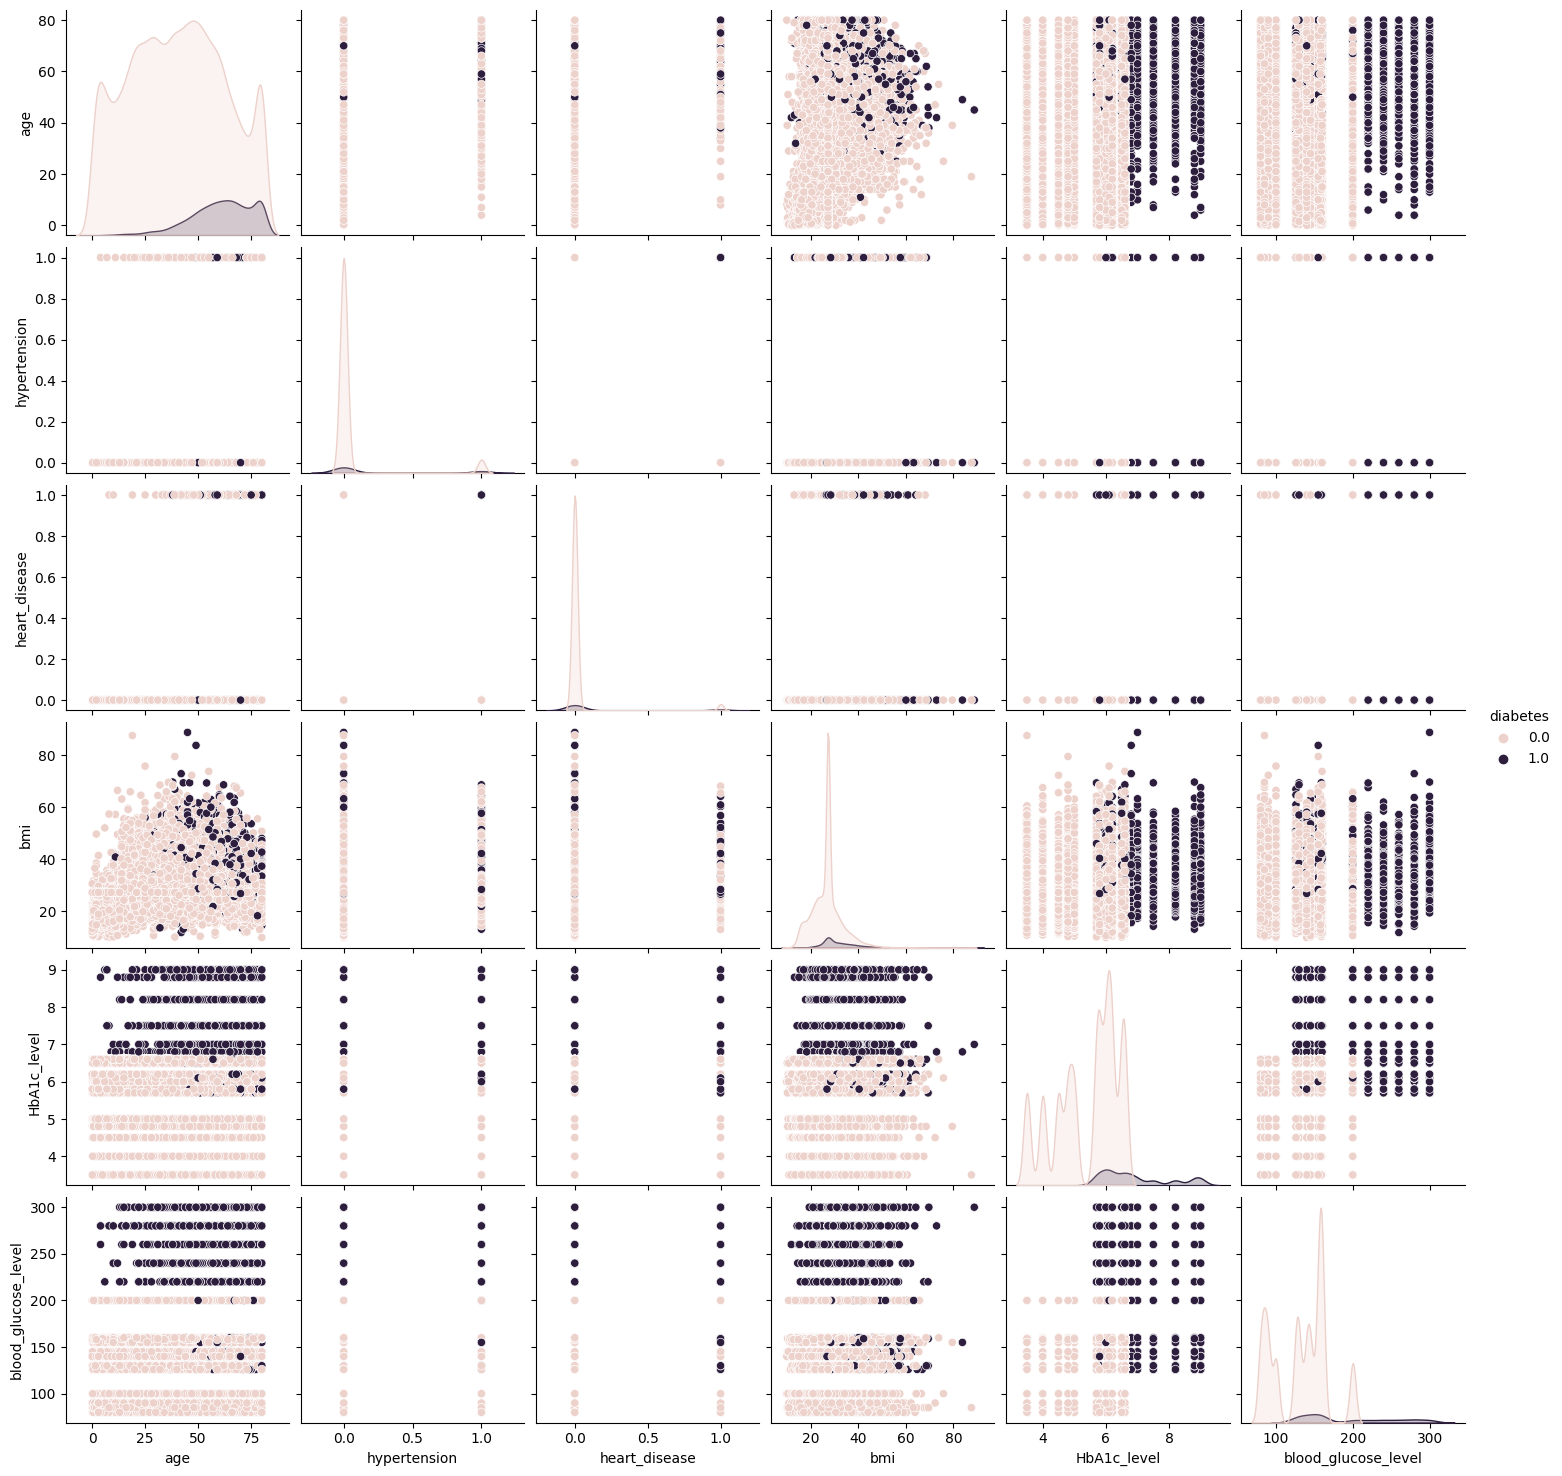

In [6]:
sns.pairplot(df,hue='diabetes')
plt.show()

In [9]:
df.isnull().sum()

gender                 0
age                    0
hypertension           1
heart_disease          1
smoking_history        1
bmi                    1
HbA1c_level            1
blood_glucose_level    1
diabetes               1
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [15]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

**Converting Categorical Variables Into Numeric Values Using LabelEncoder & OneHotEncoder**

In [22]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [23]:
LE = LabelEncoder()

In [50]:
df['gender'] = LE.fit_transform(df['gender'])

In [52]:
OHE = OneHotEncoder()

In [54]:
encoded_data = OHE.fit_transform(df[['smoking_history']])

In [55]:
# Convert the encoded data to a dense array
encoded_data_dense = encoded_data.toarray()

In [57]:
# Create a new DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data_dense, columns=OHE.categories_[0])

In [58]:
# Concatenate the original DataFrame and the encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

In [59]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,No Info,current,ever,former,never,not current
0,0,80.0,0,1,never,25.19,6.6,140,0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,54.0,0,0,No Info,27.32,6.6,80,0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,28.0,0,0,never,27.32,5.7,158,0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,36.0,0,0,current,23.45,5.0,155,0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,76.0,1,1,current,20.14,4.8,155,0,0.0,1.0,0.0,0.0,0.0,0.0


In [78]:
X = df.drop(columns=['diabetes','smoking_history'],axis=1)
X

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,No Info,current,ever,former,never,not current
0,0,80.0,0,1,25.19,6.6,140,0.0,0.0,0.0,0.0,1.0,0.0
1,0,54.0,0,0,27.32,6.6,80,1.0,0.0,0.0,0.0,0.0,0.0
2,1,28.0,0,0,27.32,5.7,158,0.0,0.0,0.0,0.0,1.0,0.0
3,0,36.0,0,0,23.45,5.0,155,0.0,1.0,0.0,0.0,0.0,0.0
4,1,76.0,1,1,20.14,4.8,155,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,27.32,6.2,90,1.0,0.0,0.0,0.0,0.0,0.0
99996,0,2.0,0,0,17.37,6.5,100,1.0,0.0,0.0,0.0,0.0,0.0
99997,1,66.0,0,0,27.83,5.7,155,0.0,0.0,0.0,1.0,0.0,0.0
99998,0,24.0,0,0,35.42,4.0,100,0.0,0.0,0.0,0.0,1.0,0.0


In [79]:
y = df['diabetes']
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

**Train & Test Split**

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**Making RandomForestClassifier & Choosing best hper parameters using Bayesian**

In [82]:
from sklearn.ensemble import RandomForestClassifier
from hyperopt import fmin,tpe,Trials,STATUS_OK,hp
from sklearn.model_selection import cross_val_score

In [83]:
RNF = RandomForestClassifier()

In [84]:
Space = {
    'n_estimators' : hp.quniform('n_estimators',50,500,50),
    'criterion' : hp.choice('criterion',["gini", "entropy", "log_loss"]),
    'max_depth' : hp.quniform('max_depth',1,10,1)

}

In [85]:
def Bayesian(Space):
  RNF = RandomForestClassifier(n_estimators = int(Space['n_estimators']),
                               criterion=Space['criterion'],
                               max_depth=int(Space['max_depth']))
  accuracy = cross_val_score(RNF,X_train,y_train,cv=5).mean()
  return {'loss':-accuracy , 'status' : STATUS_OK}

In [86]:
trials = Trials()

In [88]:
Best = fmin(fn=Bayesian,space=Space,algo=tpe.suggest,trials=trials,max_evals=50)

 98%|█████████▊| 49/50 [26:33<00:44, 44.26s/trial, best loss: -0.9718]


In [89]:
Best

{'criterion': 1, 'max_depth': 7.0, 'n_estimators': 400.0}

In [92]:
RNF = RandomForestClassifier(criterion = 'entropy', max_depth = 7, n_estimators=400)

In [93]:
RNF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=400)

**Making Predictions**

In [94]:
y_hat = RNF.predict(X_test)

**Checking accuracy of the model**

In [95]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [96]:
print(accuracy_score(y_test,y_hat))

0.97215


In [97]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.67      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



In [98]:
print(confusion_matrix(y_test,y_hat))

[[18292     0]
 [  557  1151]]


**Using Adaboost**

In [143]:
from sklearn.ensemble import AdaBoostClassifier

In [144]:
Ada = AdaBoostClassifier()

In [149]:
Space2 = {
    
    'n_estimators' : hp.quniform('n_estimators',50,500,50),
    'algorithm' : hp.choice('algorithm',['SAMME', 'SAMME.R']),
    'learning_rate' : hp.uniform('learning_rate',1,5)
    
}

In [150]:
def Bayesian2(Space2):
  Ada = AdaBoostClassifier(n_estimators = int(Space2['n_estimators']),
                           algorithm = Space2['algorithm'],
                           learning_rate = float(Space2['learning_rate']))
  accuracy = cross_val_score(Ada,X_train,y_train,cv=5).mean()
  return {'loss': -accuracy , 'status' : STATUS_OK}


In [151]:
trails2 = Trials()

In [152]:
Best2 = fmin(fn=Bayesian2,space=Space2,algo=tpe.suggest,max_evals=50,trials=trails2)

100%|██████████| 50/50 [43:43<00:00, 52.47s/trial, best loss: -0.9719374999999999]


In [154]:
Best2

{'algorithm': 1, 'learning_rate': 1.6687282958619445, 'n_estimators': 250.0}

In [157]:
Ada = AdaBoostClassifier(n_estimators= 250,learning_rate= 1.6687282958619445,algorithm= 'SAMME.R')

In [158]:
Ada.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=1.6687282958619445, n_estimators=250)

**Making Prediction**

In [160]:
y_hat2 = Ada.predict(X_test)

**Checking Accuracy**

In [161]:
print(accuracy_score(y_test,y_hat2))

0.9722


In [162]:
print(classification_report(y_test,y_hat2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.97      0.70      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.97      0.85      0.90     20000
weighted avg       0.97      0.97      0.97     20000



In [163]:
print(confusion_matrix(y_test,y_hat2))

[[18252    40]
 [  516  1192]]
